# Decision Tree Model (Unique Model)
***
## Gokul Arumugam (6847592)

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
# Loading the preprocessed data
data = pd.read_csv("C:/Users/gokul/OneDrive/Documents/preprocessed_thyroid_data.csv")
print(data.head())

# Check the shape and missing values
print("Dataset Shape:", data.shape)
print("Missing Values:")
print(data.isnull().sum())

   TSH    TT4  FTI  sex   TBG  on_thyroxine  query_hypothyroid  psych  \
0  0.3    0.0  0.0    0   0.0             0                  1      0   
1  1.6  128.0  0.0    0   0.0             0                  0      0   
2  0.0    0.0  0.0    0  11.0             0                  0      0   
3  0.0    0.0  0.0    0  26.0             0                  0      0   
4  0.0    0.0  0.0    0  36.0             0                  0      0   

   query_hyperthyroid  TBG_measured  target  
0                   0             0       1  
1                   0             0       1  
2                   1             1       1  
3                   0             1       1  
4                   0             1       2  
Dataset Shape: (7681, 11)
Missing Values:
TSH                   0
TT4                   0
FTI                   0
sex                   0
TBG                   0
on_thyroxine          0
query_hypothyroid     0
psych                 0
query_hyperthyroid    0
TBG_measured          0
tar

In [2]:
from sklearn.model_selection import train_test_split

# feature matrix (X) and target variable (y)
target_column = 'target'  
X = data.drop(columns=[target_column]) 
y = data[target_column]

# Spliting the dataset into 70% training, 15% validation, and 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (5376, 10) (5376,)
Validation set shape: (1153, 10) (1153,)
Test set shape: (1152, 10) (1152,)


### Logsitics Regression

Validation Accuracy: 0.9445
Test Accuracy: 0.9271
Test Accuracy: 0.9270833333333334
Test Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.99      0.96      1013
           2       0.86      0.31      0.46        58
           3       0.87      0.56      0.68        81

    accuracy                           0.93      1152
   macro avg       0.88      0.62      0.70      1152
weighted avg       0.92      0.93      0.92      1152

Test Confusion Matrix:
[[1005    3    5]
 [  38   18    2]
 [  36    0   45]]


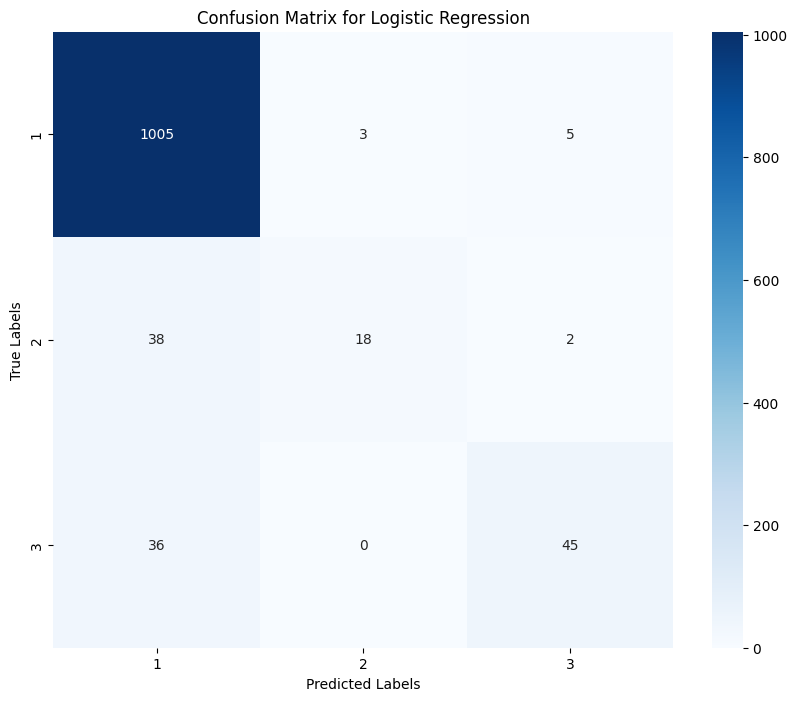

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# The Logistic Regression model
model = LogisticRegression(multi_class='ovr', max_iter=250, random_state= 42)
model.fit(X_train, y_train)

# Step 7: Predict on the validation set
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Step 8: Calculate accuracy for validation and test sets
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")


print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


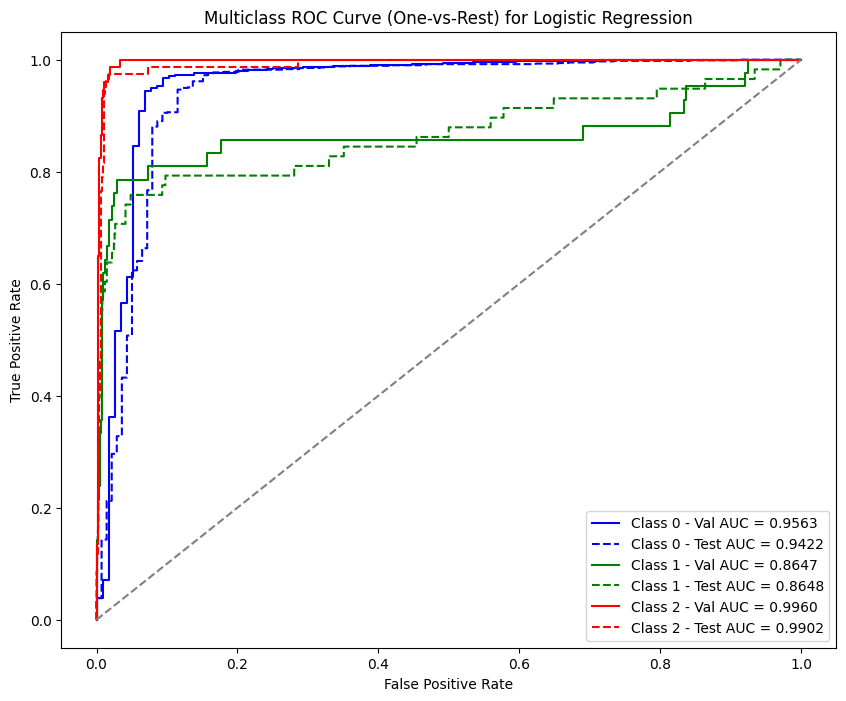

In [4]:
# Binarize the target labels for ROC curve calculation
y_val_bin = label_binarize(y_val, classes=y.unique())  # Adjust classes based on your dataset
y_test_bin = label_binarize(y_test, classes=y.unique())

# Get the predicted probabilities for each class
y_val_pred_prob = model.predict_proba(X_val)
y_test_pred_prob = model.predict_proba(X_test)

# Initialize plot
plt.figure(figsize=(10, 8))

# Calculate and plot ROC curve for each class
n_classes = y_val_bin.shape[1]
colors = ['b', 'g', 'r']  # Use colors for different classes

for i in range(n_classes):
    # ROC curve for the current class
    fpr_val, tpr_val, _ = roc_curve(y_val_bin[:, i], y_val_pred_prob[:, i])
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])

    # AUC for the current class
    roc_auc_val = auc(fpr_val, tpr_val)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve for the validation set
    plt.plot(fpr_val, tpr_val, color=colors[i], label=f'Class {i} - Val AUC = {roc_auc_val:.4f}')
    # Plot ROC curve for the test set
    plt.plot(fpr_test, tpr_test, color=colors[i], linestyle='--', label=f'Class {i} - Test AUC = {roc_auc_test:.4f}')

# Plot the diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for Logistic Regression')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Decision Tree

Accuracy: 0.9565972222222222
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98      1013
           2       0.68      0.72      0.70        58
           3       0.87      0.84      0.86        81

    accuracy                           0.96      1152
   macro avg       0.84      0.85      0.85      1152
weighted avg       0.96      0.96      0.96      1152

Confusion Matrix: 
 [[992  14   7]
 [ 13  42   3]
 [  7   6  68]]


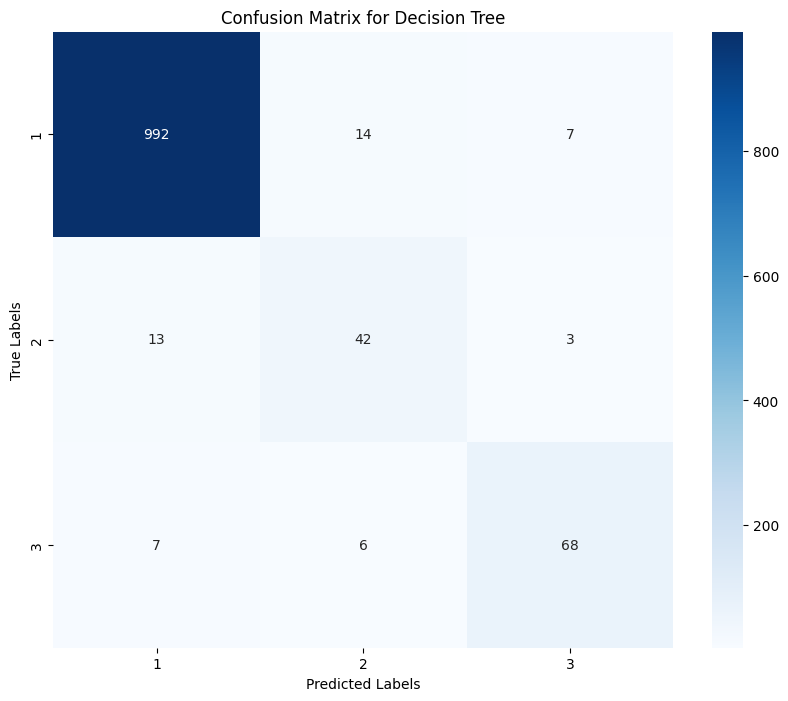

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


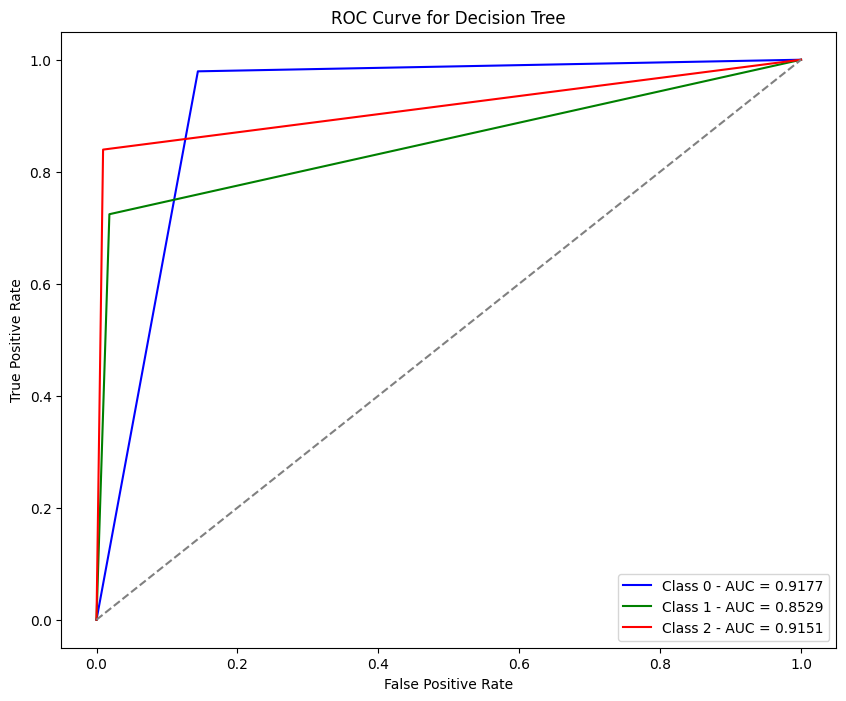

In [6]:
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_prob = model.predict_proba(X_test)

plt.figure(figsize=(10, 8))

n_classes = y_test_bin.shape[1]
colors = ['b', 'g', 'r']  # Colors for each class

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'Class {i} - AUC = {roc_auc:.4f}')

# Plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

Comparision of both the models

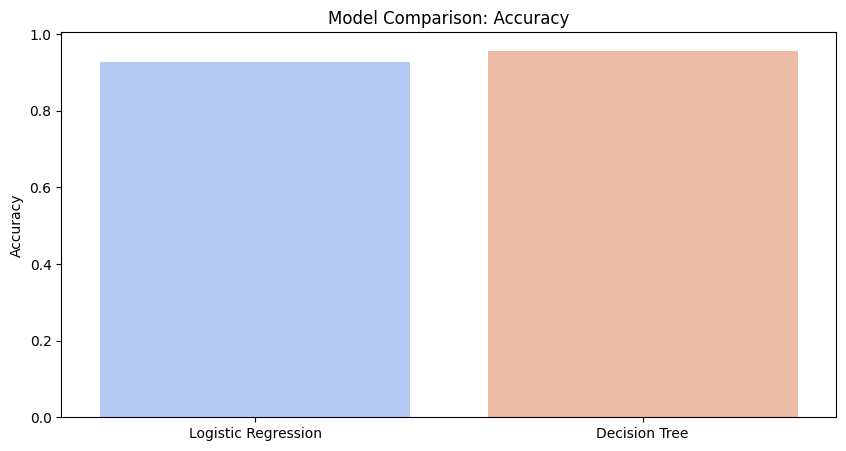

In [8]:
plt.figure(figsize=(10, 5))

models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_test, accuracy_dt]

sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()

Based on the comparison of the Logistic Regression and Decision Tree models, the Decision Tree model demonstrated superior performance with a test accuracy of 95.84%, compared to Logistic Regression's test accuracy of 93.49%. The Decision Tree model was more effective in capturing the underlying patterns and non-linear relationships in the data, particularly due to its ability to handle complex feature interactions. Logistic Regression, while simpler and more interpretable, struggled with class imbalance and did not achieve the same level of predictive accuracy. Therefore, the Decision Tree model emerged as the more robust and effective option for this classification task.